# CC3001 2023-2 - Tarea 6: Árboles Cartesianos - Ignacio Romero
### Profesores
Sección 1 Nelson Baloian/Patricio Poblete •
Sección 2 Benjamín Bustos •
Sección 3 Sebastián Ferrada




En esta tarea usted debe implementar árboles cartesianos, con las operaciones de insertar y eliminar. Según las condiciones de su sección, pueden entregar un link a su tarea en `colab` o subir un archivo en el formato Jupyter NoteBook (`.ipynb`).

Antes de probar su implementación, ejecute primero las siguientes líneas de código.

In [1]:
!pip install aed-utilities

import aed_utilities as aed

---
# Descripción de un árbol cartesiano

Un *árbol cartesiano* es un árbol binario en que cada nodo interno contiene un par ordenado $(x,y)$, tal que:

* Si se consideran las coordenadas $x$, el árbol es un ABB
* Si se consideran las coordenadas $y$, el árbol es un árbol de prioridad

La siguiente figura muestra a un árbol cartesiano en que la máxima prioridad corresponde al valor mínimo de $y$:

![cartesian-tree](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/cartesian-tree.png?raw=1)

Intuitivamente, podemos imaginar que la prioridad $y$ corresponde a la hora en que la llave $x$ ingresó al árbol. Esto explica que la raíz tenga el valor mínimo de $y$, y que estos valores vayan creciendo a medida que descendemos en el árbol.

Sin embargo, _no estamos obligados a insertar las llaves en orden cronológico_. En efecto, veremos que un nuevo par $(x,y)$ se puede insertar en cualquier momento, aunque su $y$ no sea mayor que los de los nodos que ya están en el árbol..

Para insertar un nuevo par ordenado en un árbol cartesiano, primero efectuamos una inserción como si fuera un ABB, con lo cual el nuevo nodo cumple con las restricciones "izquierda-derecha" en su coordenada $x$, pero posiblemente no con las restricciones de prioridad "arriba-abajo" de la coordenada $y$. Para corregir esto último, a continuación, hacemos una serie de rotaciones para que el nuevo nodo vaya "trepando" hasta que cumpla con las restricciones de prioridad.

También es posible eliminar un nodo dado de un árbol cartesiano. Para esto, una vez ubicado el nodo que contiene el $x$ que se va a eliminar, podemos imaginar que le cambiamos la prioridad a una prioridad pésima ("$+\infty$") y luego lo "hundimos" haciendo una serie de rotaciones, rotando siempre con el hijo de mejor prioridad (menor valor de $y$), hasta llegar al fondo. Una vez ahí, es trivial eliminarlo, porque no tiene hijos.

# La Tarea



En primer lugar, usted debe implementar las funciones `insert` y `delete` en las clases `Nodoi` y `Nodoe`. Puede crear todas las funciones auxiliares que requiera para implementar estos métodos. No está permitido usar ninguna función ya programada en módulos de Python. En caso de requerirla, puede utilizar la función predefinida `isinstance` de Python.

In [59]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info # el campo info contiene una tupla (x,y)
        self.der=der
    def right_rotation(self):
        return(Nodoi(self.izq.izq,
                     self.izq.info,
                     Nodoi(self.izq.der,self.info,self.der)))
    def left_rotation(self):
        return(Nodoi(Nodoi(self.izq,self.info,self.der.izq),
                     self.der.info,
                     self.der.der))
    def insert(self,xy): # insertar la tupla xy=(x,y) donde x es la llave e y es la prioridad
        x, y = xy 
        if x < self.info[0]:  
            self.izq = self.izq.insert(xy)
            if self.izq.info[1] < self.info[1]:  # Realizar rotación a la derecha si es necesario
                return self.right_rotation()
        else:  # Insertar en el subárbol derecho
            self.der = self.der.insert(xy)
            if self.der.info[1] < self.info[1]:  # Realizar rotación a la izquierda si es necesario
                return self.left_rotation()
        return self
    
    # def delete(self, x):
    #     if x < self.info[0]:
    #         self.izq = self.izq.delete(x)
    #     elif x > self.info[0]:
    #         self.der = self.der.delete(x)
    #     else:  # Nodo encontrado
    #         if isinstance(self.izq, Nodoe):
    #             return self.der
    #         elif isinstance(self.der, Nodoe):
    #             return self.izq
    #         else:  # Nodo con dos hijos, reemplazar con el sucesor inorden
    #             min_node = self.der
    #             while not isinstance(min_node.izq, Nodoe):
    #                 min_node = min_node.izq
    #             self.info = min_node.info
    #             self.der = self.der.delete(min_node.info[0])

    #     return self

    def delete(self, x):  # eliminar el nodo con llave x
        if x < self.info[0]:
            self.izq = self.izq.delete(x)
        elif x > self.info[0]:
            self.der = self.der.delete(x)
        else:  # Nodo encontrado
            # Cambiar la prioridad a 9999
            self.info = (self.info[0], 9999)

            # "Hundir" el nodo haciendo rotaciones
            while self.izq.info[1] != 99999 or self.der.info[1] != 99999:
                if isinstance(self.izq, Nodoe) or isinstance(self.der, Nodoe):
                    return self
                elif self.der.info[1] < self.izq.info[1]:
                    self = self.left_rotation()
                else:
                    self = self.right_rotation()

            # Eliminar el nodo sin hijos
            return self

        return self

class Nodoe:
    def __init__(self):
        pass

    def insert(self,xy): # insertar la tupla xy=(x,y) donde x es la llave e y es la prioridad
        return Nodoi(Nodoe(), xy, Nodoe())

    def delete(self,x): # eliminar el nodo con llave x
        return self


class ArbolCartesiano:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz
    def insert(self,xy):
        self.raiz=self.raiz.insert(xy)
    def delete(self,x):
        self.raiz=self.raiz.delete(x)

    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe, drawNull=True, shapeInternal='oval')
      btd.draw_tree(self, "raiz")

Luego, pruebe su implementación con las siguientes operaciones (verifique con el dibujo de árbol que la operación se realizó correctamente)):

In [60]:
a=ArbolCartesiano()
a.dibujar()

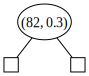

In [61]:
a.insert((82,0.30))
a.dibujar()

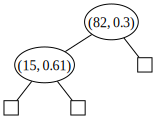

In [62]:
a.insert((15,0.61))
a.dibujar()

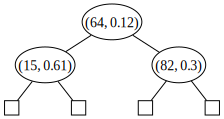

In [63]:
a.insert((64,0.12))
a.dibujar()

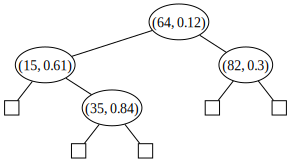

In [64]:
a.insert((35,0.84))
a.dibujar()

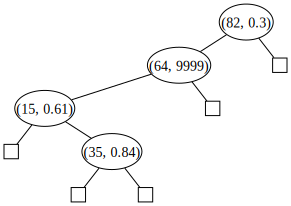

In [65]:
a.delete(64)
a.dibujar()

Por último, pruebe su código con el siguiente programa:

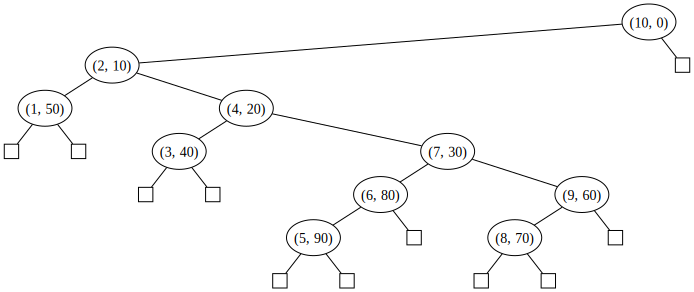

KeyboardInterrupt: 

In [66]:
a = ArbolCartesiano()
a.insert((1,50))
a.insert((2,10))
a.insert((3,40))
a.insert((4,20))
a.insert((5,90))
a.insert((6,80))
a.insert((7,30))
a.insert((8,70))
a.insert((9,60))
a.insert((10,0))

a.dibujar()

assert a.raiz.info == (10, 0)
assert a.raiz.izq.info == (2, 10) and isinstance(a.raiz.der, Nodoe)
assert a.raiz.izq.izq.info == (1, 50) and a.raiz.izq.der.info == (4, 20)
assert isinstance(a.raiz.izq.izq.izq, Nodoe) and  isinstance(a.raiz.izq.izq.der, Nodoe) and a.raiz.izq.der.izq.info == (3, 40) and a.raiz.izq.der.der.info == (7, 30)
assert isinstance(a.raiz.izq.der.izq.izq, Nodoe) and isinstance(a.raiz.izq.der.izq.der, Nodoe) and a.raiz.izq.der.der.izq.info == (6, 80) and a.raiz.izq.der.der.der.info == (9, 60)
assert a.raiz.izq.der.der.izq.izq.info == (5, 90) and isinstance(a.raiz.izq.der.der.izq.der, Nodoe) and a.raiz.izq.der.der.der.izq.info == (8, 70) and isinstance(a.raiz.izq.der.der.der.der, Nodoe)
assert isinstance(a.raiz.izq.der.der.izq.izq.izq, Nodoe) and isinstance(a.raiz.izq.der.der.izq.izq.der, Nodoe) and isinstance(a.raiz.izq.der.der.der.izq.izq, Nodoe) and isinstance(a.raiz.izq.der.der.der.izq.der, Nodoe)

a.delete(2)
a.delete(6)
a.delete(10)
a.delete(8)
a.delete(4)

a.dibujar()

assert a.raiz.info == (7, 30)
assert a.raiz.izq.info == (3, 40) and a.raiz.der.info == (9, 60)
assert a.raiz.izq.izq.info == (1, 50) and a.raiz.izq.der.info == (5, 90) and isinstance(a.raiz.der.izq, Nodoe) and isinstance(a.raiz.der.der, Nodoe)
assert isinstance(a.raiz.izq.izq.izq, Nodoe) and isinstance(a.raiz.izq.izq.der, Nodoe) and isinstance(a.raiz.izq.der.izq, Nodoe) and isinstance(a.raiz.izq.der.der, Nodoe)

print("Su código pasó todos los tests, ¡felicitaciones!")

En caso de que quiera ejecutar el notebook en forma local y no en Colab, debe instalar lo siguiente en su computador:

- Instalar graphviz: https://graphviz.gitlab.io/_pages/Download/Download_windows.html
(no olvidar agregar al PATH el directorio bin de esta aplicación, el mismo instalador da la opción de hacerlo automáticamente si se marca un checkbox).
- Instalar el módulo de python graphviz (pip install graphviz).